In [15]:
import pandas as pd
import numpy as np


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv')
df.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0


In [3]:
df [df.tripId == 6351558574044883205]

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
70,3,2018-07-23 06:01:42,379,Piasta Kołodzieja,21,Kopiec Wandy,2018-07-23 06:00:00,NaN,6351558574044883205,PLANNED,1,2.0
135,6,2018-07-23 06:02:46,382,Kleeberga,21,Kopiec Wandy,2018-07-23 06:01:00,NaN,6351558574044883205,PLANNED,1,3.0
284,12,2018-07-23 06:04:54,388,Dunikowskiego,21,Kopiec Wandy,2018-07-23 06:03:00,NaN,6351558574044883205,PLANNED,1,4.0
414,17,2018-07-23 06:06:40,2539,Rondo Hipokratesa,21,Kopiec Wandy,2018-07-23 06:05:00,NaN,6351558574044883205,PLANNED,1,5.0
493,20,2018-07-23 06:07:43,392,DH Wanda,21,Kopiec Wandy,2018-07-23 06:06:00,NaN,6351558574044883205,PLANNED,1,6.0
697,28,2018-07-23 06:10:39,2745,Rondo Kocmyrzowskie im. Ks. Gorzelanego,21,Kopiec Wandy,2018-07-23 06:09:00,NaN,6351558574044883205,PLANNED,1,7.0
772,31,2018-07-23 06:11:43,418,Os.Zgody,21,Kopiec Wandy,2018-07-23 06:10:00,NaN,6351558574044883205,PLANNED,1,8.0
1007,40,2018-07-23 06:14:58,2744,Plac Centralny im. R.Reagana,21,Kopiec Wandy,2018-07-23 06:13:00,NaN,6351558574044883205,PLANNED,1,9.0
1137,45,2018-07-23 06:16:49,423,Struga,21,Kopiec Wandy,2018-07-23 06:15:00,NaN,6351558574044883205,PLANNED,1,10.0


In [4]:
df.delay.value_counts(normalize=True)

0     0.426905
1     0.344715
2     0.123509
3     0.055987
4     0.025421
5     0.011410
6     0.004852
7     0.002657
8     0.001189
9     0.000867
10    0.000587
14    0.000503
12    0.000475
11    0.000350
13    0.000336
15    0.000154
16    0.000042
19    0.000028
18    0.000014
Name: delay, dtype: float64

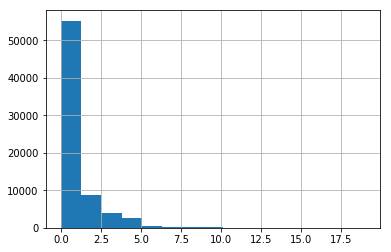

In [5]:
df.delay.hist(bins=15);

In [6]:
df.delay.describe()

count    71517.000000
mean         1.014039
std          1.357324
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         19.000000
Name: delay, dtype: float64

In [7]:
%%html

<h1> Przygotowanie danych</h1>

In [8]:
df['delay_sec'] = df['delay'].values * 60
#df['delay_sec']= df['delay'].map(lambda x:x*60)

df['direction_cat'] = df['direction'].factorize()[0]
#zmienia direction zmienną kategorialną na wartości 1/2/3 etc.

df['vehicleId'].fillna(-1,inplace=True)
#lub df['vehicleId'] = df['vehicleId'].fillna(-1)

df['seq_num'].fillna(-1,inplace=True)
#lub df['seq_num'] = df['seq_num'].fillna(-1)

columns = ['number','stop','direction_cat','vehicleId','seq_num']
X = df [ columns ].values
y = df['delay_sec'].values

model = DecisionTreeRegressor(max_depth=10)
#max_depth=10 to już wystarczająco dużo żadko kiedy daje się większą wartość. - im większa wartość model może się przeuczyć.

scores = cross_val_score(model,X,y,cv=3, scoring="neg_mean_absolute_error")
#cv - zbiór daych dzielone jest na 3porcje. Buduje modul w taki sposób że w pierwszej iteracji model trenuje na drugiej i trzeciej cześci a uczy się na pierwszej.
# w drugiej iteracji trenuje na cześci pierwszej i trzeciej a na drugiej się uczy
# w trzeciej iteracji 3 test - 1 i 2 trening
np.mean(scores), np.std(scores)


(-48.878418039750706, 2.532220057808117)

y_pred => [0, 3, 2]
y_test => [1, 2, 0]

error => [1 ,1 ,2]

In [9]:
np.mean([1 ,1 ,2])
#20 minuta filmu https://www.youtube.com/watch?v=Ax1Pufd-Vqg&feature=youtu.be

1.3333333333333333

In [10]:
df.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num',
       'delay_sec', 'direction_cat'],
      dtype='object')

In [11]:
df['direction'].unique()

array(['Kopiec Wandy', 'Walcownia', 'Czerwone Maki P+R', 'Wzgórza K.',
       'Bronowice Małe', 'Salwator', 'Mały Płaszów', 'Os.Piastów',
       'Mistrzejowice', 'Bronowice', 'Kurdwanów P+R', 'Nowy Bieżanów P+R',
       'Krowodrza Górka', 'Cichy Kącik', 'Borek Fałęcki', 'Dworzec Tow.',
       'Prokocim', 'Łagiewniki', 'Cm. Rakowicki', 'Kombinat',
       'Plac Centralny im.R.Reagana'], dtype=object)

In [12]:
df['direction'].value_counts()

Bronowice Małe                 7915
Krowodrza Górka                7140
Czerwone Maki P+R              6771
Nowy Bieżanów P+R              6111
Wzgórza K.                     5236
Borek Fałęcki                  4845
Salwator                       4478
Mistrzejowice                  4381
Kurdwanów P+R                  4010
Os.Piastów                     3973
Kopiec Wandy                   2917
Mały Płaszów                   2862
Bronowice                      2475
Prokocim                       1686
Walcownia                      1648
Cichy Kącik                    1609
Łagiewniki                     1367
Dworzec Tow.                   1161
Cm. Rakowicki                   496
Kombinat                        409
Plac Centralny im.R.Reagana      27
Name: direction, dtype: int64

In [13]:
df['delay_sec'] = df['delay'].values * 60
df['direction_cat'] = df['direction'].factorize()[0]
df['vehicleId'].fillna(-1,inplace=True)
df['seq_num'].fillna(-1,inplace=True)

columns = ['number','stop','direction_cat','vehicleId','seq_num']
X = df [ columns ].values
y = df['delay_sec'].values

model = RandomForestClassifier(max_depth=10,n_estimators=50,n_jobs=8)
#max_depth=10 to już wystarczająco dużo żadko kiedy daje się większą wartość. - im większa wartość model może się przeuczyć.
#n_jobs liczba rdzeni

scores = cross_val_score(model,X,y,cv=3, scoring="neg_mean_absolute_error")
#cv - zbiór daych dzielone jest na 3porcje. Buduje modul w taki sposób że w pierwszej iteracji model trenuje na drugiej i trzeciej cześci a uczy się na pierwszej.
# w drugiej iteracji trenuje na cześci pierwszej i trzeciej a na drugiej się uczy
# w trzeciej iteracji 3 test - 1 i 2 trening
np.mean(scores), np.std(scores)

#30minuta



C:\Users\mdebosz\Anaconda\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


(-49.12552589595948, 0.7412432929934984)

(array([1., 0., 0., 0., 0., 1., 0., 2., 0., 1.]),
 array([1030. , 1051.1, 1072.2, 1093.3, 1114.4, 1135.5, 1156.6, 1177.7,
        1198.8, 1219.9, 1241. ]),
 <a list of 10 Patch objects>)

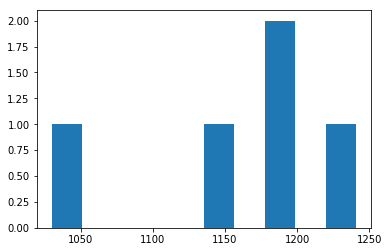

In [154]:
#plt.bar()
#plt.show()
stopCounter = df['stopName'].value_counts()
#stopCounter = stopCounter.sort_values(axis=0,ascending=False)
#stopCounter[:5]
#plt.hist(stopCounter)
stopCounterTOP = stopCounter.sort_values(axis=0,ascending=False)[:5]
plt.hist(stopCounterTOP)

In [153]:
#if( df ['stopName'] ==df.stop=125): print("Nan") 
#stopCounterTOP.index,stopCounterTOP.values


,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num,delay_sec,direction_cat
0,1,2018-07-23 06:00:45,125,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,-1.000000e+00,6351558574044883205,PLANNED,1,1.0,60,0
1,1,2018-07-23 06:00:47,125,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0,0,1
2,1,2018-07-23 06:00:48,125,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0,0,2
3,1,2018-07-23 06:00:49,125,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,-1.000000e+00,6351558574044363010,PLANNED,1,3.0,60,3
4,1,2018-07-23 06:00:49,125,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0,0,4
5,1,2018-07-23 06:00:50,125,Wawel,10,Kopiec Wandy,2018-07-23 05:59:00,-1.000000e+00,6351558574044641539,PLANNED,1,8.0,60,0
6,1,2018-07-23 06:00:50,125,Plac Wszystkich Świętych,1,Salwator,2018-07-23 05:59:00,-1.000000e+00,6351558574044375298,PLANNED,1,27.0,60,5
7,1,2018-07-23 06:00:51,125,Hala Targowa,1,Salwator,2018-07-23 06:01:00,6.352185e+18,6351558574044379394,STOPPING,0,24.0,0,5
8,1,2018-07-23 06:00:52,125,Batorego,24,Bronowice Małe,2018-07-23 06:00:00,6.352185e+18,6351558574044948738,STOPPING,0,19.0,0,4
9,1,2018-07-23 06:00:52,125,Teatr Bagatela,20,Mały Płaszów,2018-07-23 06:01:00,6.352185e+18,6351558574044846339,PREDICTED,0,7.0,0,6


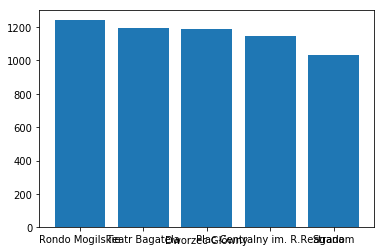

In [172]:
_ = plt.bar(stopCounterTOP.keys(),stopCounterTOP.values,width=0.8,align='center')

In [163]:
stopCounterTOP.keys()
#stopCounterTOP.values
#125,77,131,2744,359

Index(['Rondo Mogilskie', 'Teatr Bagatela', 'Dworzec Główny',
       'Plac Centralny im. R.Reagana', 'Stradom'],
      dtype='object')